# Data Science Unit 2 Sprint Challenge 3

## Logistic Regression and Beyond

In this sprint challenge you will fit a logistic regression modeling the probability of an adult having an income above 50K. The dataset is available at UCI:

https://archive.ics.uci.edu/ml/datasets/adult

Your goal is to:

1. Load, validate, and clean/prepare the data.
2. Fit a logistic regression model
3. Answer questions based on the results (as well as a few extra questions about the other modules)

Don't let the perfect be the enemy of the good! Manage your time, and make sure to get to all parts. If you get stuck wrestling with the data, simplify it (if necessary, drop features or rows) so you're able to move on. If you have time at the end, you can go back and try to fix/improve.

### Hints

It has a variety of features - some are continuous, but many are categorical. You may find [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) (a method to one-hot encode) helpful!

The features have dramatically different ranges. You may find [sklearn.preprocessing.minmax_scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.minmax_scale.html#sklearn.preprocessing.minmax_scale) helpful!

## Part 1 - Load, validate, and prepare data

The data is available at: https://archive.ics.uci.edu/ml/datasets/adult

Load it, name the columns, and make sure that you've loaded the data successfully. Note that missing values for categorical variables can essentially be considered another category ("unknown"), and may not need to be dropped.

You should also prepare the data for logistic regression - one-hot encode categorical features as appropriate.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [0]:
#adult = pd.read_csv('adult.csv')

column_names = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender','capital-gain', 'capital-loss', 'hours-per-week', 'native_country','income']

train = pd.read_csv('adult_data.txt', sep=",\s", header=None, names = column_names, engine = 'python')
test = pd.read_csv('adult_test.txt', sep=",\s", header=None, names = column_names, engine = 'python',skiprows=[0])
test['income'].replace(regex=True,inplace=True,to_replace=r'\.',value=r'')


adult = pd.concat([test,train])
adult.reset_index(inplace = True, drop = True)

In [3]:
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
adult.shape

(48842, 15)

In [5]:
adult.income.value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [6]:
adult = adult.replace('?', np.NaN)

# Which columns are missing data
total = adult.isnull().sum().sort_values(ascending=False)
percent = (adult.isnull().sum()/adult.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(25))

# Drop all remaining rows missing data and check shape! 
adult = adult.dropna()
adult.head(1)
print(adult.shape)

                 Total   Percent
occupation        2809  0.057512
workclass         2799  0.057307
native_country     857  0.017546
income               0  0.000000
hours-per-week       0  0.000000
capital-loss         0  0.000000
capital-gain         0  0.000000
gender               0  0.000000
race                 0  0.000000
relationship         0  0.000000
marital-status       0  0.000000
educational-num      0  0.000000
education            0  0.000000
fnlwgt               0  0.000000
age                  0  0.000000
(45222, 15)


In [7]:
# Make sure all NaN's were removed
total = adult.isnull().sum().sort_values(ascending=False)
percent = (adult.isnull().sum()/adult.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(25))

                 Total  Percent
income               0      0.0
native_country       0      0.0
hours-per-week       0      0.0
capital-loss         0      0.0
capital-gain         0      0.0
gender               0      0.0
race                 0      0.0
relationship         0      0.0
occupation           0      0.0
marital-status       0      0.0
educational-num      0      0.0
education            0      0.0
fnlwgt               0      0.0
workclass            0      0.0
age                  0      0.0


## Looks great! 

In [8]:
adult.native_country.value_counts()

United-States                 41292
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

In [9]:

# Lets peep the dtypes of the remaining columns with nans. 
#columns = []
#columns = ["Id"]
#nan_columns = df.columns[df.isna().any()].tolist()
#columns.extend(nan_columns)
adult.dtypes

counts_ = []
object_columns = list(adult.select_dtypes(include=['object']))
print(object_columns)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native_country', 'income']


In [10]:
# They're either from the US or not.
mask = adult['native_country'] == 'United-States'
column_name = 'native_country'
adult.loc[mask, column_name] = 1

mask = adult['native_country'] != 1
column_name = 'native_country'
adult.loc[mask, column_name] = 0
adult.head(4)

# Lets take some of the data and see if we can do some tricky feature engineering.
# Here I'll use Label Encoding 
from sklearn.preprocessing import LabelEncoder
adult[object_columns] = adult[object_columns].apply(LabelEncoder().fit_transform)
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native_country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,1,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,1,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,1,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,1,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,1,0


In [0]:
# Define my X & Y
y=adult["income"]
X=adult.drop(columns=['income'])

# Going to try a standard scaling my X.
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X)
X_scaled = X_scaler.transform(X)

# Here is where I split the model into test/train sets. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

Great! All the nans are removed, the data has been encoded, standardized, and split into clean test/train groups.


## Part 2 - Fit and present a Logistic Regression

Your data should now be in a state to fit a logistic regression. Use scikit-learn, define your `X` (independent variable) and `y`, and fit a model.

Then, present results - display coefficients in as interpretible a way as you can (hint - scaling the numeric features will help, as it will at least make coefficients more comparable to each other). If you find it helpful for interpretation, you can also generate predictions for cases (like our 5 year old rich kid on the Titanic) or make visualizations - but the goal is your exploration to be able to answer the question, not any particular plot (i.e. don't worry about polishing it).

It is *optional* to use `train_test_split` or validate your model more generally - that is not the core focus for this week. So, it is suggested you focus on fitting a model first, and if you have time at the end you can do further validation.

In [0]:
# Lets define a performance evaluation function.
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000,
                            n_jobs=-1, 
                            verbose=1,
                            random_state=42)

In [14]:
# Fit with the Original Data
logreg.fit(X_train, y_train)

# lets check the performance w/ Undersampling

# Generate Y predictions.
y_predicted = logreg.predict(X_test)

# Generate inspect performance. 
accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted)
trials = []
trials.append(["Trial","accuracy","precision","recall","f1"])
trial = "Base"
trials.append([trial, accuracy, precision, recall, f1])
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

[LibLinear]accuracy = 0.820, precision = 0.809, recall = 0.820, f1 = 0.805


In [15]:
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=-1, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=1, warm_start=False)

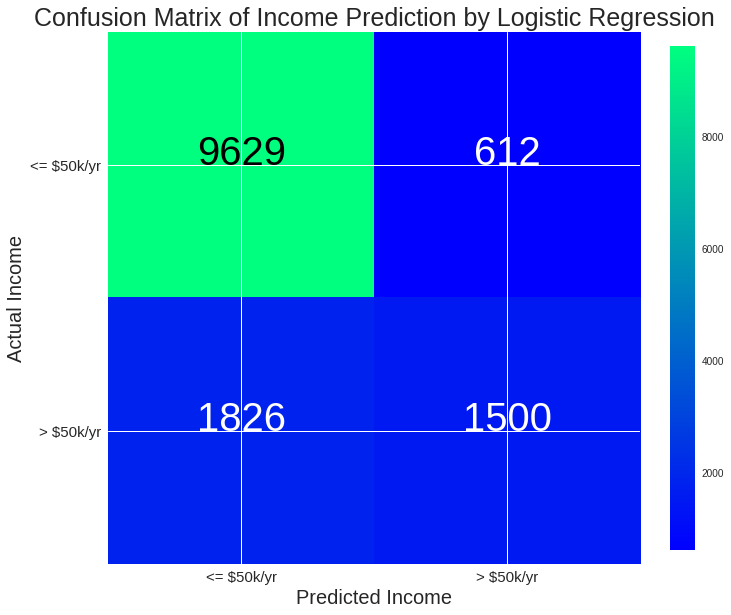

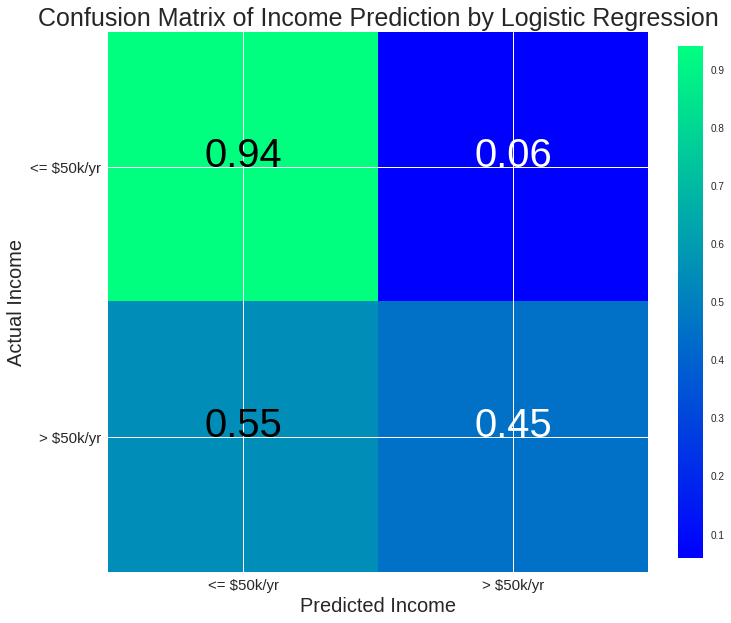

In [19]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar(fraction=0.043, pad=0.05)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=15)
    plt.yticks(tick_marks, classes, fontsize=15)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('Actual Income', fontsize=20)
    plt.xlabel('Predicted Income', fontsize=20)
    plt.title(title,fontsize=25)
    return plt

### Print a confusion matrix to inspect how well our classifier is/isn't doing.
# <=50k = 0
# >50k = 1
cm = confusion_matrix(y_test, y_predicted, labels = [0,1])
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['<= $50k/yr','> $50k/yr'], normalize=False,
                            title="Confusion Matrix of Income Prediction (counts) by Logistic Regression")
plt.title(f'Confusion Matrix of Income Prediction by Logistic Regression',fontsize=25)
plt.show()

print(' \n\n\n')

cm = confusion_matrix(y_test, y_predicted, labels = [0,1])
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['<= $50k/yr','> $50k/yr'], normalize=True, 
                             title = 'Confusion Matrix of Income Prediction (percent) by Logistic Regression')
plt.title(f'Confusion Matrix of Income Prediction by Logistic Regression',fontsize=25)
plt.show()


In [17]:
# Print the Coefficients
feature_names = list(X.columns)
print ("Features and their coefficient:")
print (sorted(zip(map(lambda x: round(x, 4), list(logreg.coef_[0])), feature_names),reverse=True))

Features and their coefficient:
[(2.3354, 'capital-gain'), (0.8504, 'educational-num'), (0.4871, 'age'), (0.4086, 'gender'), (0.3599, 'hours-per-week'), (0.2654, 'capital-loss'), (0.0849, 'race'), (0.0814, 'education'), (0.0669, 'fnlwgt'), (0.0085, 'occupation'), (-0.0011, 'native_country'), (-0.1188, 'workclass'), (-0.2329, 'relationship'), (-0.3189, 'marital-status')]


In [18]:
adult.income.value_counts()

0    34014
1    11208
Name: income, dtype: int64

## Part 3 - Analysis, Interpretation, and Questions

###  Q: Based on your above model, answer the following questions

1. What are 3 features positively correlated with income above 50k?
2. What are 3 features negatively correlated with income above 50k?
3. Overall, how well does the model explain the data and what insights do you derive from it?

*These answers count* - that is, make sure to spend some time on them, connecting to your analysis above. There is no single right answer, but as long as you support your reasoning with evidence you are on the right track.

Note - scikit-learn logistic regression does *not* automatically perform a hypothesis test on coefficients. That is OK - if you scale the data they are more comparable in weight.
****


#### A: Model Analysis and Interpretation
**1.) Three features postitively corrilated with income above $50K are:**

   * `Captial Gain` - **the coefficient for this is 2.4454**, which is very high because it our data is standardized so it is very very strong. I wouldn't suggest that it is perfectly co-linear with income, because there are some people who buy and sell assets. But normally the purchase and sale of assets for profit is a strong indicator of wealth & access to credit. 
   * `educatonal-num` - **the coefficient for this is 0.8504**, Education is often associated with 
   * `age` - **the coefficient for this is 0.4871**, People who have been alive longer are more financially established and have working experience. That makes sense.

**2.) What are 3 features negatively correlated with income above 50K?**

  * `marital-status` **coeff -0.3189** This was suprising to me! But there can be large gaps in individual performance depending on personal relationships. 
  * `relationship` **coeff -0.2329**
  * `workclass` - **coeff -0.1188 ** 
  
**3.) How well does the model explain the data? What are some insights you can derive from it?**

`This model does a fairly good job predicting who will make less than $ 50k per year (94% correct, 6% incorrect ),  but it does a poor job of correctly predicting who made more than $ 50k per year (45% correct, 55% incorrect)`

`It would perform better if we had more data about individuals who make more than $ 50k per year. :) 
It may be wise to use a balanced sampling method as well.  But we can definitely use this model to predict who will make less than $50K per year. `



### Q: Match the following situation descriptions with the model most appropriate to addressing them

In addition to logistic regression, a number of other approaches were covered this week. Pair them with the situations they are most appropriate for, and briefly explain why.

Situations:
1. You are given data on academic performance of primary school students, and asked to fit a model to help predict "at-risk" students who are likely to receive the bottom tier of grades.
2. You are studying tech companies and their patterns in releasing new products, and would like to be able to model and predict when a new product is likely to be launched.
3. You are working on modeling expected plant size and yield with a laboratory that is able to capture fantastically detailed physical data about plants, but only of a few dozen plants at a time.

Approaches:
1. Ridge Regression
2. Quantile Regression
3. Survival Analysis


### A: Matched situations

**1.)  You are given data on academic performance of primary school students, and asked to fit a model to help predict "at-risk" students who are likely to receive the bottom tier of grades.**

*Quantile Analysis: This would let me select any quantile near the bottom and effectively fit a model to represent it. *

**2.)  You are studying tech companies and their patterns in releasing new products, and would like to be able to model and predict when a new product is likely to be launched.**

*Survival Analysis: The redesign/refresh cycle of product development and release follows a lifecycle pattern that would be well modeled and explored utilizing survival analysis.*

**3.)  You are working on modeling expected plant size and yield with a laboratory that is able to capture fantastically detailed physical data about plants, but only of a few dozen plants at a time.**

*Ridge Regression: RR has better performance characteristics than other approaches when the sample size is small because it can effectively prevent overfitting through L2 regularization." *
